In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Kuramoto model
$$ \dot \varphi_i = \omega_i + \frac K N \sum_{j=1}^N{a_{ij}}\sin(\varphi_j - \varphi_i)$$

In [2]:
#define all needed variables
N = 100
phi = np.zeros(N)
omega = np.random.uniform(low=-1, high=1, size=(N))
# omega = omega**3 - 0.3*omega
K = 9.5
A = np.ones((N,N)) - np.eye(N) #this is all to all right now
dt = 0.01
T_max = 10
t = np.arange(0, T_max, dt)
print(t.shape)

(1000,)


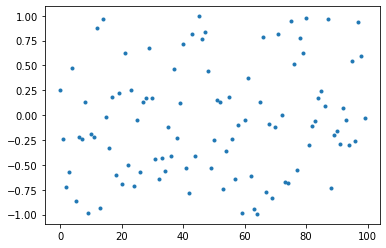

In [3]:
plt.plot(omega, '.')

In [4]:
def phi_dot(phi, t, omega, K):
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] #+ K/N *np.sum(A[i]@np.sin(phi - phi[i]))
    return dphi_dt

print(phi_dot(phi, 0, omega, K))

[ 0.25294517 -0.23624236 -0.71888259 -0.57564296  0.4781897  -0.86524787
 -0.22195359 -0.24002066  0.12902445 -0.97983926 -0.19052027 -0.21870779
  0.88094751 -0.9357391   0.96784636 -0.02036128 -0.33329276  0.1862419
 -0.59977964  0.22046647 -0.68765086  0.62544468 -0.50522987  0.25064071
 -0.71384215 -0.04674084 -0.57636874  0.12734051  0.17512717  0.67604837
  0.17165998 -0.44385804 -0.64672073 -0.43026475 -0.56491601 -0.11917581
 -0.41321436  0.46555848 -0.22995221  0.12667126  0.71482322 -0.52810596
 -0.78208316  0.8119158  -0.40781012  0.99419482  0.76505651  0.83717504
  0.44313262 -0.53022106 -0.25319384  0.15417201  0.13271839 -0.74727862
 -0.36169352  0.18312222 -0.23980916 -0.64356177 -0.09931642 -0.9797661
 -0.04834291  0.37689387 -0.61188063 -0.94026043 -0.99294633  0.13703915
  0.78074785 -0.76983588 -0.08437368 -0.83407894 -0.11901441  0.81982462
 -0.00251827 -0.66987906 -0.67774012  0.94997551  0.51203779 -0.54680059
  0.77143293  0.62452115  0.97385665 -0.29574148 -0.1

[  6.32362923  -5.90605893 -17.97206481 -14.39107398  11.95474258
 -21.63119673  -5.54883964  -6.00051641   3.22561117 -24.49598142
  -4.76300672  -5.46769484  22.02368781 -23.39347739  24.19615893
  -0.50903188  -8.33231891   4.65604756 -14.99449108   5.51166171
 -17.19127152  15.63611711 -12.63074685   6.26601786 -17.84605373
  -1.16852095 -14.40921838   3.18351272   4.37817924  16.90120914
   4.29149954 -11.09645108 -16.16801834 -10.75661882 -14.12290016
  -2.97939518 -10.33035903  11.63896191  -5.74880519   3.16678148
  17.87058062 -13.20264906 -19.55207893  20.2978949  -10.19525312
  24.85487058  19.1264127   20.92937594  11.07831561 -13.25552647
  -6.32984593   3.85430022   3.31795981 -18.68196538  -9.04233792
   4.5780554   -5.99522907 -16.08904425  -2.48291061 -24.49415254
  -1.20857279   9.42234668 -15.29701564 -23.50651084 -24.82365828
   3.42597874  19.51869618 -19.24589698  -2.10934199 -20.85197346
  -2.97536019  20.49561543  -0.06295673 -16.74697641 -16.94350298
  23.74938

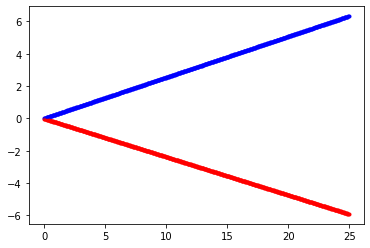

In [5]:
n_timestep = 500
dt = 0.05
t = 0
phi = np.zeros(N)
for i in range(n_timestep):
    phi += phi_dot(phi, t, omega, K)*dt
#     print(phi)
#     for j in range(len(phi)):
#         if(phi[j]<0):
#             phi[j] += 2*np.pi
#         if(phi[j]>(2*np.pi)):
#             phi[j] -= 2*np.pi
    plt.plot(t, phi[0], 'b.')
    plt.plot(t, phi[1], 'r.')
    t += dt
print(phi)

In [6]:
# i = 0
# phi = np.random.uniform(size=N)
# # print(phi)
# print(np.sum(A[i]@np.sin(phi - phi[i])))

# answer = 0 
# for i in range(N):
#     if i >0:
#         answer += np.sin(phi[i] - phi[0])
# print(answer)

-0.055485372045774264


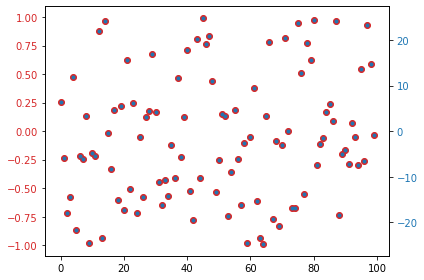

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
# omega_test = omega +np.random.uniform(0,1, size = (omega.shape))
ax1.plot(omega, 'o', color=color,linewidth=7.0)
print(np.mean(omega))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(phi, '.', color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [8]:
# phi = np.zeros(N)
print(np.zeros(N).shape)
# print(t.shape)
print(omega.shape)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K))

(100,)
(100,)


(200, 100)


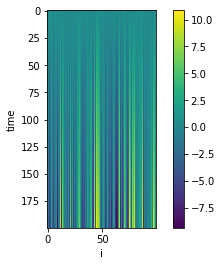

In [9]:
print(sol.shape)
plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()

-0.055485372045774264


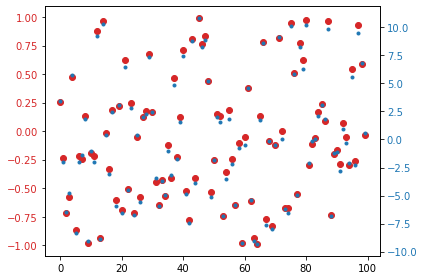

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
# omega_test = omega +np.random.uniform(0,1, size = (omega.shape))
ax1.plot(omega, 'o', color=color,linewidth=7.0)
print(np.mean(omega))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(sol[-1,:], '.', color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

(200, 100)


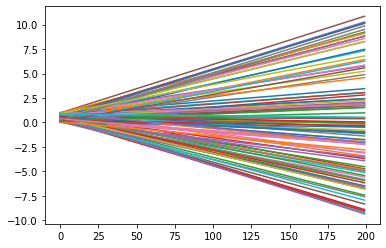

In [11]:
print(sol.shape)
# plt.plot(np.sin(sol[:,0]))
# plt.plot(sol[:,0])
# plt.plot(sol[:,1])
# plt.plot(sol[:,2])
for i in range(100):
    plt.plot(sol[:,i])
# plt.plot(np.sin(sol[:,1]))
# plt.plot(np.sin(sol[:,2]))

In [12]:
# def phi_dot2(phi, t, omega):
#     return omega

# sol = odeint(phi_dot2, [0], t, args=([0.5],))
# # plt.plot(sol)